## Preamble

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import describe
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24

# disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# plots inisde jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', palette='muted')
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

import datetime as dt
import xgboost as xgb

In [7]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [8]:
def serie_split(s, fcast_len = 90):
    """
    We split our datasets: year 2017 is used for validation and the rest is for training.
    As our goal is to predict the first 90 days of 2018, we use only the first 90 days for validation.
    """
    train = s.iloc[s.index < '2017-01-01']
    test = s.iloc[s.index >= '2017-01-01'].iloc[:fcast_len]
    
    return train, test

## Load data

In [9]:
df = pd.read_csv('../data/train.csv')
df['date'] = pd.to_datetime(df['date'])
df.index = pd.DatetimeIndex(df['date'])

## Training

In [10]:
from rolling import Rolling

In [11]:
def train_and_validate(serie):
    r = Rolling(window=365)

    model = xgb.XGBRegressor(n_jobs=-1)
    
    train, test = serie_split(serie)
    train_X, train_y = r.make_training_data(train)

    model.fit(train_X, train_y)

    y = r.predict(model.predict, train)

    return smape(y, test)

## Run all models

In [12]:
errors = []
for store in range(1,11):
    for item in range(1,51):
        sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
        error = train_and_validate(sales)
        print(error)
        errors.append(error)

22.689162357309584
15.933136269062517
16.026707961098246
20.225466231291445
24.778601788395562
14.897109251553532
14.820856520478545
12.832542859409747
14.009638200506965
12.951276558392589
11.72057508791376
12.411474588367865
11.292299765594759
14.028551047059297
11.445466637311132
20.92118566526828
15.95219119986153
13.344086687500095
16.73486921150301
13.675310834771217
16.3575072897129
13.345534222677225
17.286568318988284
13.053142977282237
10.313500947983556
16.680982732072636
23.452430111455552
12.745284090142642
14.105701193713859
15.243006762354677
13.288044825150207
17.095318647384143
12.690455209420891
19.100684462567507
13.42892433070632
11.011177021471864
19.788817966797744
12.093418245102647
15.2509746341059
21.59870587435788
23.45756623930497
18.3590818153269
13.47522230088848
17.781728190475523
11.548469471420828
11.23305061344768
19.870837396537
13.417975330517097
18.918550510888164
11.726966106186792
17.899662319945524
12.125572479818032
13.325127484735134
16.90388343

17.325793993561494
19.772733049768785
15.821244381628741
13.218674413328962
20.955476164300713
9.670311342215225
12.936747286115937
21.019373628970467
14.197491821552019
16.87577724545241
11.189258360346686
20.64460634287903
12.203667413494484
16.780079326133517
18.54829953034621
20.395421761513266
11.639313981150824
11.96040397345782
12.000695879952183
10.561389419273874
11.84554029654193
11.354734221784451
11.684622504304457
10.65106606105049
14.290115472761126
10.34008654107451
17.271882459963894
15.299682122874286
10.18338856221456
15.874507462859258
11.448619774319132
16.049436305570136
12.529018700770262
15.930307564905887
12.154199612492082
10.980786043529886
15.390446980773929
17.495350123406
8.521542639362256
9.11315197925933
14.49406537922168
11.674506346114528
14.108076478678091
11.745042995557485
20.522879787044854
13.279472073265064
10.905702749522634
17.107884415156082
10.255979248915208
13.082519873148033
16.73105764586341
23.218211475045532
16.140341781060965
12.1270837

In [13]:
print(f"SMAPE = {np.mean(errors)}")

SMAPE = 15.041399804642642


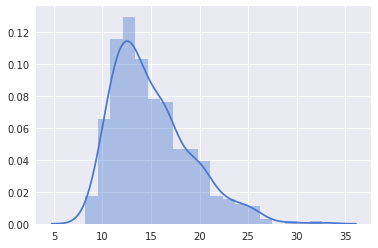

In [14]:
sns.distplot(errors)
plt.savefig('xgboost_simple.svg')
plt.show()